In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
df_fair = sm.datasets.fair.load_pandas().data

In [5]:
df = df_fair
res = smf.ols('affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)', df).fit(cov_type='HC3')
display(res.summary())
res_1 = res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.39
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.75e-64
Time:                        08:53:23   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:                  HC3                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.3341      0.498      2.678      0.007       0.358       2.311
C(rate_marriage)[T.2.0]                       1.9654      0.921      2.134      0.033       0.160       3.771
C(rate_marriage)[T.3.0]                       1.0479      0.634      1.654      0.098      -0.194       2.290
C(rate_marriage)[T.4.0]                      -0.3282      0.517     -0.635      0.525      -1.341       0.685
C(rate_marriage)[T.5.0]                      -0.6430      0.522     -1.232      0.218      -1.666       0.380
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1143      0.627      0.182      0.855      -1.115       1.343
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -1.6960      0.815     -2.082      0.037      -3.293      -0.099
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -1.0762      0.418     -2.574      0.010      -1.896      -0.257
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.2356      0.154     -1.528      0.126      -0.538       0.067
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.3539      0.161     -2.201      0.028      -0.669      -0.039
C(rate_marriage)[1.0]:C(religious)[T.3.0]    -0.3413      0.529     -0.646      0.519      -1.377       0.695
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -2.2120      0.790     -2.800      0.005      -3.760      -0.664
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -1.3154      0.404     -3.255      0.001      -2.108      -0.523
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4746      0.148     -3.211      0.001      -0.764      -0.185
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.3861      0.161     -2.391      0.017      -0.703      -0.070
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.6082      0.588     -1.035      0.301      -1.760       0.544
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -2.8273      0.806     -3.509      0.000      -4.407      -1.248
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -1.7089      0.426     -4.016      0.000      -2.543      -0.875
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7028      0.156     -4.513      0.000      -1.008      -0.398
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.5886      0.158     -3.727      0.000      -0.898      -0.279
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [6]:
resid_res_1_sample = res.resid.sample(frac=0.1, random_state=20190429)

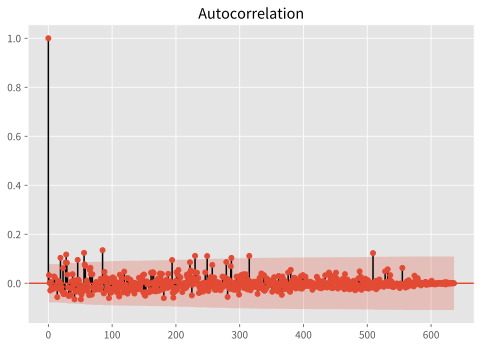

In [7]:
s = resid_res_1_sample
_ = sm.graphics.tsa.plot_acf(s)
# plt_savefig('autocorr_resid_res_1_sample.png')

/Users/mosky/.local/share/virtualenvs/data-lab-nMfUIH0t/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


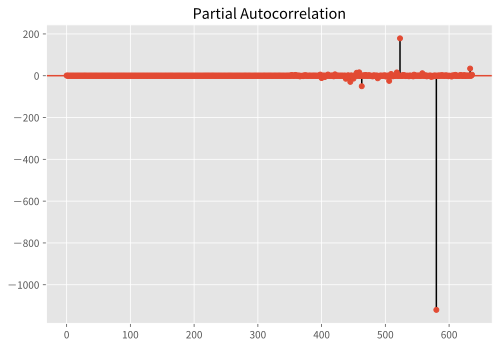

In [8]:
s = resid_res_1_sample
_ = sm.graphics.tsa.plot_pacf(s)